In [1]:
import prodigy
import json
from prodigy_util_functions import *
import prodigy
import collections
DB = prodigy.core.connect()
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [6]:
for k in all_dat_dic.keys():
            all_dat_dic[k] = [update_hashes(i) for i in all_dat_dic[k]]

## Overview

This notebook is designed to evaluate annotator progress and agreement for annotations of condemnation severity. The chunk

In [49]:
annotator_prefixes = ['joe_severity', 'nour_severity', 'jillian_severity','negin_severity', 'xiaoyan_severity', 'sanjna_severity']

# annotation_rounds = ['r1', 'r2', 'r3', 'r4']
annotation_rounds = ['r1', 'r2']

input_data_paths = [#'../annotated_data/condemnation_tweets_3_or_less_targets.jsonl',
#                     '../annotated_data/condemnation_tweets_3_or_less_targets_r2.jsonl',
#                     '../annotated_data/condemnation_tweets_3_or_less_targets_r3.jsonl',
                    '../annotated_data/condemnation_tweets_3_or_less_targets.jsonl']

In [68]:
annotator_prefixes = ['negin_severity', 'xiaoyan_severity', 'sanjna_severity']

# annotation_rounds = ['r1', 'r2', 'r3', 'r4']
annotation_rounds = ['r4']

input_data_paths = [#'../annotated_data/condemnation_tweets_3_or_less_targets.jsonl',
#                     '../annotated_data/condemnation_tweets_3_or_less_targets_r2.jsonl',
#                     '../annotated_data/condemnation_tweets_3_or_less_targets_r3.jsonl',
                    '../annotated_data/condemnation_tweets_3_or_less_targets_r4.jsonl']

In [ ]:
hash_ids_to_reannotate = annotated_df[annotated_df.diff_thresh == True].index
annotations [eg for eg in input_data if eg['_input_hash'] in hash_ids_to_reannotate]

In [5]:
def extract_egs_to_reannotate(annotated_df, input_data, path):
    hash_ids_to_reannotate = annotated_df[annotated_df.diff_thresh == True].index
    annotations = [eg for eg in input_data if eg['_input_hash'] in hash_ids_to_reannotate]
    
    print(f'N tweets >= threshold: {len(annotations)}')
    
    with open(path, 'w') as f:
        for eg in annotations:
            f.write(json.dumps(eg))
    
    return(annotations)
    
    


In [80]:
[i for i in all_dat_dic['ta_negin_severity'] if i['_input_hash'] == 111989939]

[{'text': "-JOHN DOE- being accused of sexual assault is as surprising as it will be when we hear another dead women has showed up on OJ's street",
  'meta': {'tweet_id': '925844090477936642',
   'mask_map': {'<TARGET 1>': 'Brett Ratner'},
   'pattern_match': True,
   'target_label': '<TARGET 1>',
   'target': 'Brett Ratner'},
  'spans': [{'start': 0,
    'end': 10,
    'label': 'TARGET',
    'target': '<TARGET 1>'}],
  'label': 1,
  '_input_hash': 111989939,
  '_task_hash': 1221569092,
  'options': [{'id': 1, 'text': '1'},
   {'id': 2, 'text': '2'},
   {'id': 3, 'text': '3'},
   {'id': 4, 'text': '4'},
   {'id': 5, 'text': '5'},
   {'id': 6, 'text': '6'},
   {'id': 7, 'text': '7'},
   {'id': 8, 'text': '8'},
   {'id': 9, 'text': '9'},
   {'id': 0, 'text': '0'},
   {'id': 'hard_to_parse', 'text': 'hard_to_parse'}],
  '_session_id': None,
  '_view_id': 'choice',
  'accept': [6],
  'answer': 'accept'}]

----ta_negin_severity----
N annotations: 250
N Duplicates: 8

----ta_xiaoyan_severity----
N annotations: 250
N Duplicates: 10

----ta_sanjna_severity----
N annotations: 250
N Duplicates: 10

Processing raw input data for cross-check analysis...
--------
 Input file: ../annotated_data/condemnation_tweets_3_or_less_targets_r4.jsonl N items for annotation: 250

Total N unique annotations in input data: 250

----Extracting unlabeled data----
N examples in input data: 250
ta_negin_severity: 250
ta_xiaoyan_severity: 250
ta_sanjna_severity: 250
Remaining annotations:
ta_negin_severity: 0
ta_xiaoyan_severity: 0
ta_sanjna_severity: 0
3 annotators matched on 240 annotations
                  negin_severity  xiaoyan_severity  sanjna_severity
negin_severity          1.000000          0.731112         0.620556
xiaoyan_severity        0.731112          1.000000         0.609295
sanjna_severity         0.620556          0.609295         1.000000
Calculating results for 239 annotations


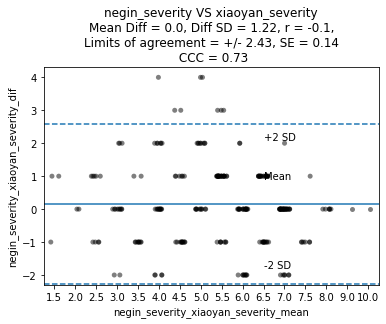

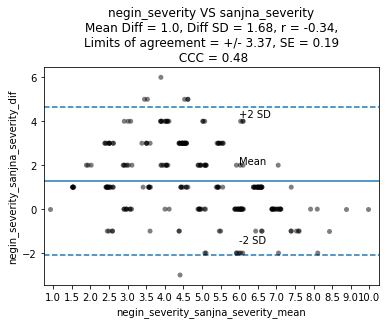

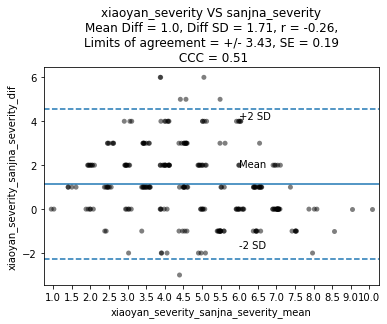

In [69]:
all_dat_dic = get_sets_multi(DB, annotators = annotator_prefixes, rounds = annotation_rounds, update_hashes = True)
options_map = extract_options(all_dat_dic)
merged_annotations, annotations_by_hash = extract_severity_annotations(all_dat_dic)

# Given the input data, count and select number of annotations that have not been annotated
print(f'Processing raw input data for cross-check analysis...')
input_data = load_input_datasets(input_data_paths)

print(f'\n----Extracting unlabeled data----')
unlabeled_data = select_unlabeled_data(input_data, all_dat_dic)
annotated_df = merged_annotations_to_df(merged_annotations, min_annotator_n = len(annotator_prefixes), colnames = annotator_prefixes)
annotated_df = add_diffs(annotated_df)
hash_ids_to_reannotate = annotated_df[annotated_df.diff_thresh == True].index


In [32]:
egs_beyond_thresh

[{'text': "Here we go again. Yet another LIBERAL accused of sexual harassment. This time it's -JOHN DOE- from none other than ultra-liberal #NPR. The lack of moral compass and integrity will be undoing of what is left of Democrat Party. #MAGA #WednesdayWisdom #tcot #WorldVeganDay URL",
  'meta': {'tweet_id': '925856978475171841',
   'mask_map': {'<TARGET 1>': 'Michael Oreskes'},
   'pattern_match': True,
   'target_label': '<TARGET 1>',
   'target': 'Michael Oreskes'},
  'spans': [{'start': 83,
    'end': 93,
    'label': 'TARGET',
    'target': '<TARGET 1>'}],
  'label': 1,
  'accept': [1],
  '_input_hash': -2132209441,
  '_task_hash': 1288887063},
 {'text': '#-JOHN DOE-Brothers #<OTHER TARGET 2> everyone seems to have a problem keeping their dicks in their pants',
  'meta': {'tweet_id': '921183431379378176',
   'mask_map': {'<TARGET 1>': 'Harvey Weinstein',
    '<TARGET 2>': 'David Blaine'},
   'pattern_match': True,
   'target_label': '<TARGET 1>',
   'target': 'Harvey Weinstein'},


In [7]:
new_merged = {}
for k in merged_annotations.keys():
        if len(merged_annotations[k]) == 3:
            new_merged[k] = merged_annotations[k]

In [9]:
new_merged[-2129662268]

[[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1]]

In [ ]:
    new_merged = {}

    for k in merged_annotations.keys():
        if len(merged_annotations[k]) == 3:
            new_merged[k] = merged_annotations[k]
    
    sev_dat = pd.DataFrame({ key:pd.Series(value) for key, value in new_merged.items() }).T
    sev_dat.columns = colnames
    

2 annotators matched on 70 annotations
                       ta_sanjna_severity_r3  ta_negin_severity_r3
ta_sanjna_severity_r3               1.000000              0.605541
ta_negin_severity_r3                0.605541              1.000000
Calculating results for 69 annotations


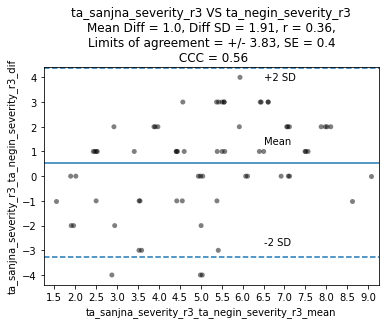

In [17]:
input_sets = ['ta_sanjna_severity_r3','ta_negin_severity_r3']
DB = prodigy.core.connect()
for set_id in input_sets:
    if set_id not in DB:
        msg.fail(f"Can't find input dataset '{set_id}' in database", exits=1)

all_examples = {set_id: DB.get_dataset(set_id) for set_id in input_sets}

options_map = extract_options(all_examples)
merged_annotations, annotations_by_hash = extract_severity_annotations(all_examples)

# # Given the input data, count and select number of annotations that have not been annotated
# print(f'Processing raw input data for cross-check analysis...')
# #input_data = load_input_datasets(input_data_paths)

# print(f'\n----Extracting unlabeled data----')
# #unlabeled_data = select_unlabeled_data(input_data, all_dat_dic)
annotated_df = merged_annotations_to_df(merged_annotations, min_annotator_n = 2, colnames = input_sets)
annotated_df = add_diffs(annotated_df)
hash_ids_to_reannotate = annotated_df[annotated_df.diff_thresh == True].index

# all_examples_beyond_thresh = {}


**All Annotations**

In [70]:
#annotated_df['kellogg_avg'] = annotated_df[['joe_severity', 'nour_severity', 'jillian_severity']].mean(axis=1)
annotated_df['mcgill_avg'] = annotated_df[['negin_severity', 'xiaoyan_severity', 'sanjna_severity']].mean(axis=1)

**Correlations for all 203 annotations**

In [65]:
annotated_df[['joe_severity', 'nour_severity', 'jillian_severity','negin_severity', 'xiaoyan_severity', 'sanjna_severity', 'kellogg_avg', 'mcgill_avg']].corr()

,joe_severity,nour_severity,jillian_severity,negin_severity,xiaoyan_severity,sanjna_severity,kellogg_avg,mcgill_avg
joe_severity,1.000000,0.815406,0.620618,0.533477,0.632149,0.621455,0.919368,0.720683
nour_severity,0.815406,1.000000,0.628575,0.512576,0.584882,0.639441,0.918853,0.704553
jillian_severity,0.620618,0.628575,1.000000,0.352181,0.511640,0.704673,0.831245,0.649552
negin_severity,0.533477,0.512576,0.352181,1.000000,0.494838,0.461799,0.527094,0.769815
xiaoyan_severity,0.632149,0.584882,0.511640,0.494838,1.000000,0.619393,0.648990,0.836686
sanjna_severity,0.621455,0.639441,0.704673,0.461799,0.619393,1.000000,0.732676,0.869493
kellogg_avg,0.919368,0.918853,0.831245,0.527094,0.648990,0.732676,1.000000,0.777239
mcgill_avg,0.720683,0.704553,0.649552,0.769815,0.836686,0.869493,0.777239,1.000000


In [71]:
annotated_df[['negin_severity', 'xiaoyan_severity', 'sanjna_severity', 'mcgill_avg']].corr()

,negin_severity,xiaoyan_severity,sanjna_severity,mcgill_avg
negin_severity,1.000000,0.731112,0.620556,0.875207
xiaoyan_severity,0.731112,1.000000,0.616115,0.879614
sanjna_severity,0.620556,0.616115,1.000000,0.875174
mcgill_avg,0.875207,0.879614,0.875174,1.000000


**Correlations for which any pair of annotators have spread >= 4**

In [66]:
annotated_df[annotated_df.diff_thresh == True][['joe_severity', 'nour_severity', 'jillian_severity','negin_severity', 'xiaoyan_severity', 'sanjna_severity', 'kellogg_avg', 'mcgill_avg']].corr()

,joe_severity,nour_severity,jillian_severity,negin_severity,xiaoyan_severity,sanjna_severity,kellogg_avg,mcgill_avg
joe_severity,1.000000,0.784154,0.411265,0.291457,0.440009,0.414260,0.890713,0.574042
nour_severity,0.784154,1.000000,0.446426,0.212840,0.310824,0.424472,0.899420,0.486508
jillian_severity,0.411265,0.446426,1.000000,-0.053019,0.187688,0.508733,0.714697,0.358096
negin_severity,0.291457,0.212840,-0.053019,1.000000,0.093692,0.028231,0.191212,0.523763
xiaoyan_severity,0.440009,0.310824,0.187688,0.093692,1.000000,0.359407,0.380431,0.696375
sanjna_severity,0.414260,0.424472,0.508733,0.028231,0.359407,1.000000,0.530840,0.761396
kellogg_avg,0.890713,0.899420,0.714697,0.191212,0.380431,0.530840,1.000000,0.569851
mcgill_avg,0.574042,0.486508,0.358096,0.523763,0.696375,0.761396,0.569851,1.000000


In [76]:
annotated_df[annotated_df.diff_thresh == True].shape[0]/annotated_df.shape[0]

0.1589958158995816

In [73]:
annotated_df[annotated_df.diff_thresh == True][['negin_severity', 'xiaoyan_severity', 'sanjna_severity', 'mcgill_avg']].corr()

,negin_severity,xiaoyan_severity,sanjna_severity,mcgill_avg
negin_severity,1.000000,0.222024,0.636033,0.693136
xiaoyan_severity,0.222024,1.000000,0.328795,0.806815
sanjna_severity,0.636033,0.328795,1.000000,0.769017
mcgill_avg,0.693136,0.806815,0.769017,1.000000


**Correlations for which all pairs of annotators have spread < 4**

In [74]:
annotated_df[annotated_df.diff_thresh == False][['negin_severity', 'xiaoyan_severity', 'sanjna_severity', 'mcgill_avg']].corr()

,negin_severity,xiaoyan_severity,sanjna_severity,mcgill_avg
negin_severity,1.000000,0.797934,0.764706,0.918473
xiaoyan_severity,0.797934,1.000000,0.762097,0.918649
sanjna_severity,0.764706,0.762097,1.000000,0.927012
mcgill_avg,0.918473,0.918649,0.927012,1.000000
